torch.Size([3, 256, 256])


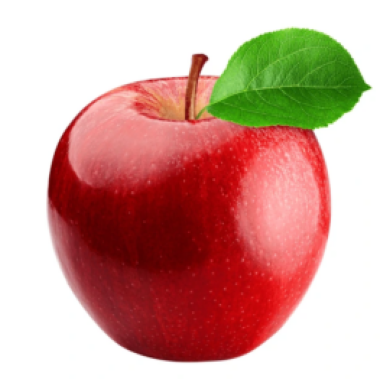

In [28]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms

# 定义图像转换
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # 调整图像大小
    transforms.ToTensor(),         # 转换为张量
])

# 加载 JPG 图像
img_path = 'Apple.jpg'  # 替换为你的图像路径
image = Image.open(img_path)

# 应用转换
img_tensor = transform(image)
print(img_tensor.shape)

# 将张量转换为 NumPy 数组
img_numpy = img_tensor.numpy()  # 形状为 (C, H, W)
img_numpy = img_numpy.transpose((1, 2, 0))  # 转换为 (H, W, C)

# 显示图像
plt.imshow(img_numpy)
plt.axis('off')  # 不显示坐标轴
plt.show()


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the autoencoder architecture
class Autoencoder(nn.Module):
	def __init__(self):
		super(Autoencoder, self).__init__()
		self.encoder = nn.Sequential(
			nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
			nn.ReLU(),
			nn.MaxPool2d(kernel_size=2, stride=2),
			nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
			nn.ReLU(),
			nn.MaxPool2d(kernel_size=2, stride=2)
		)
		self.decoder = nn.Sequential(
			nn.ConvTranspose2d(8, 16, 
							kernel_size=3, 
							stride=2, 
							padding=1, 
							output_padding=1),
			nn.ReLU(),
			nn.ConvTranspose2d(16, 3, 
							kernel_size=3, 
							stride=2, 
							padding=1, 
							output_padding=1),
			nn.Sigmoid()
		)
		
	def forward(self, x):
		x = self.encoder(x)
		x = self.decoder(x)
		return x


# Initialize the autoencoder
model = Autoencoder()

# Move the model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the autoencoder
num_epochs = 20
for epoch in range(num_epochs):
	img = img_tensor.to(device)
	optimizer.zero_grad()
	output = model(img)
	loss = criterion(output, img)
	loss.backward()
	optimizer.step()
	if epoch % 50 == 0:
		print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Save the model
torch.save(model.state_dict(), 'conv_autoencoder.pth')


cuda
Epoch [1/20], Loss: 0.1710


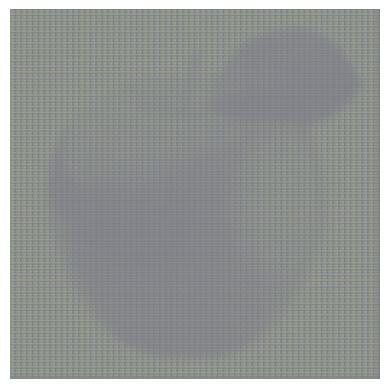

In [34]:
with torch.no_grad():
	data = img_tensor.to(device)
	recon = model(data)

import matplotlib.pyplot as plt
plt.imshow(recon.cpu().numpy().transpose((1, 2, 0)))
plt.axis('OFF')
plt.show()